In [1]:
#COMP9517 Project Task 1
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max

(576, 720)


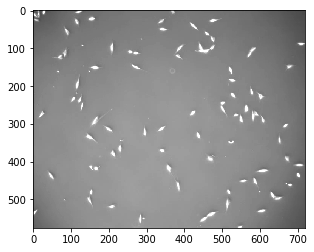

In [71]:
img = cv2.imread('./9517/PhC-C2DL-PSC/Sequence 1/t003.tif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray, cmap='gray')

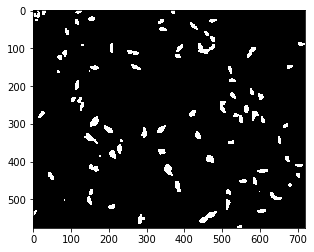

In [72]:
#transform the image to be binary (using thresholding)
threshold = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY)[1]

#set up a 3,3 kernel
kernel = np.ones((3,3),np.uint8)

#using opening for noise cancelling around the objects
opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)

#dilation to increase object size in image after noise removal
sure_bg = cv2.dilate(opening, kernel)
plt.imshow(sure_bg, cmap='gray')

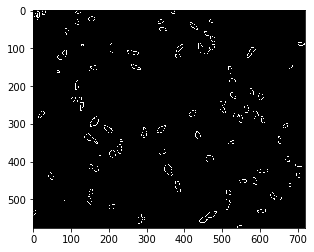

In [73]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0,255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(unknown, cmap='gray')

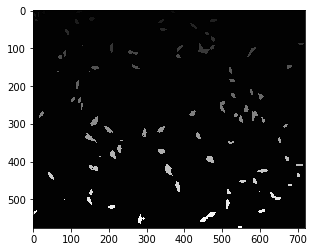

In [74]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers, cmap='gray')

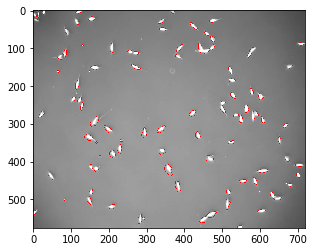

In [75]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(img)